# ANALYSIS ON WINE FEATURES | Econ 430 Project

Group: Leonardo Livio Fancello, Hayden Johnson, Cade Foster, Quentin Bidwell

## Introduction

According to Vintage Market Research, the wine industry was worth $417.9 billion in the year 2021 and will continue to grow by a Compound Annual Growth Rate (CAGR) of 6.20 percent.Therefore, we can utilize data on the wine market to cash in on this lucrative industry. We want to address which factors and features of a high-quality wine can be appreciated by sommeliers and customers alike. Through our statistical analysis, we can answer such questions. Wine is composed of a wide array of chemical substances, hence, the following analysis will provide a clue about the relationship among such chemical variables and the quality level.

### Coefficients

**fixed acidity**:
most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
**volatile acidity**:
the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
**citric acid**:
found in small quantities, citric acid can add 'freshness' and flavor to wines
**residual sugar**:
the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and
**chlorides**:
the amount of salt in the wine
**free sulfur dioxide**:
the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
**total sulfur dioxide**:
amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
**density**:
the density of water is close to that of water depending on the percent alcohol and sugar content
**pH**:
describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
**sulphates**:
a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
**alcohol**:
the percent alcohol content of the wine
**quality**:
output variable (based on sensory data, score between 0 and 10)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from BorutaShap import BorutaShap
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from simple_colors import *

In [2]:
wine = pd.read_csv("winequality-red.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine.columns = [c.replace(" ", "_") for c in wine.columns]
wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Descriptive analysis

### Descriptive analysis

In [4]:
wine.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


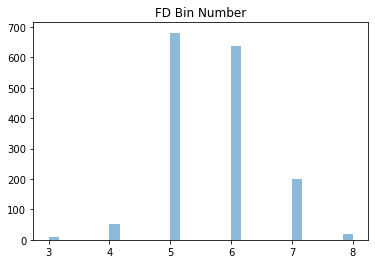

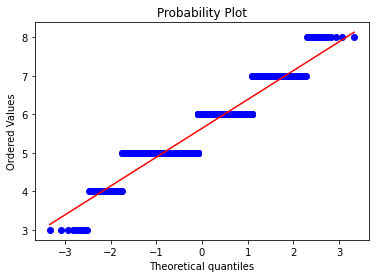

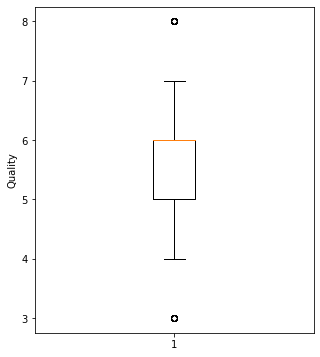

In [6]:
plt.hist(wine.quality, alpha = .5, bins = "fd")
plt.title("FD Bin Number")
plt.show()
stats.probplot(wine.quality, dist = "norm", plot = plt)
plt.show()
plt.figure(figsize=(5,6))
plt.boxplot(wine.quality)
plt.ylabel("Quality")
plt.show()

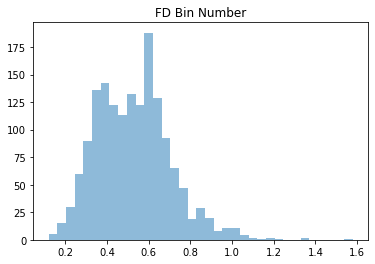

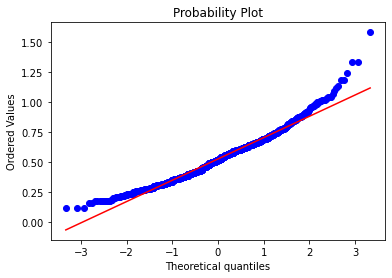

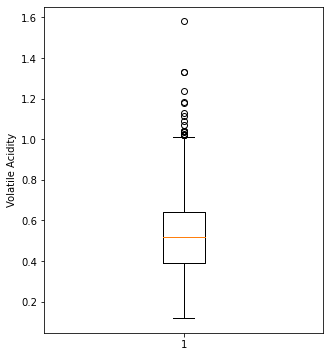

In [7]:
plt.hist(wine.volatile_acidity, alpha = .5, bins = "fd")
plt.title("FD Bin Number")
plt.show()
stats.probplot(wine.volatile_acidity, dist = "norm", plot = plt)
plt.show()
plt.figure(figsize=(5,6))
plt.boxplot(wine.volatile_acidity)
plt.ylabel("Volatile Acidity")
plt.show()

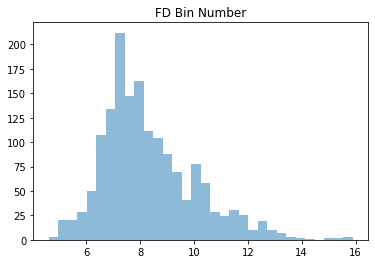

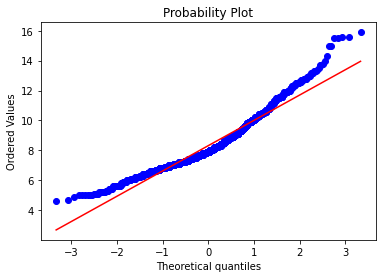

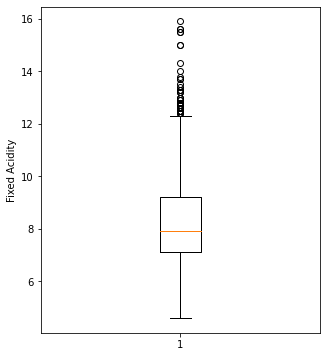

In [8]:
plt.hist(wine.fixed_acidity, alpha = .5, bins = "fd")
plt.title("FD Bin Number")
plt.show()
stats.probplot(wine.fixed_acidity, dist = "norm", plot = plt)
plt.show()
plt.figure(figsize=(5,6))
plt.boxplot(wine.fixed_acidity)
plt.ylabel("Fixed Acidity")
plt.show()

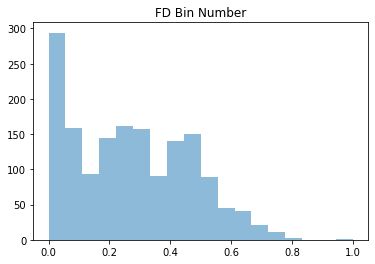

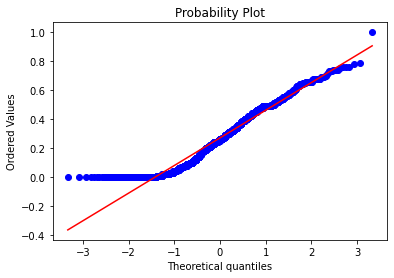

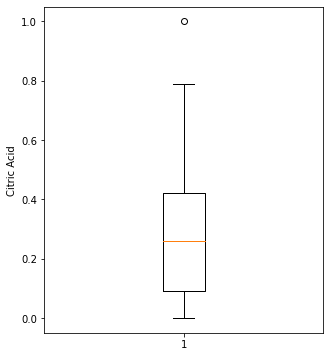

In [9]:
plt.hist(wine.citric_acid, alpha = .5, bins = "fd")
plt.title("FD Bin Number")
plt.show()
stats.probplot(wine.citric_acid, dist = "norm", plot = plt)
plt.show()
plt.figure(figsize=(5,6))
plt.boxplot(wine.citric_acid)
plt.ylabel("Citric Acid")
plt.show()

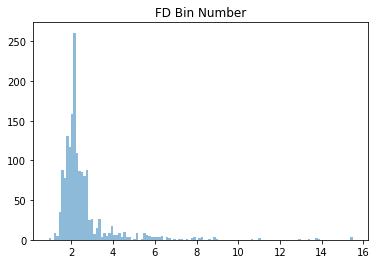

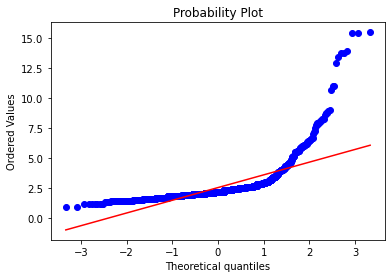

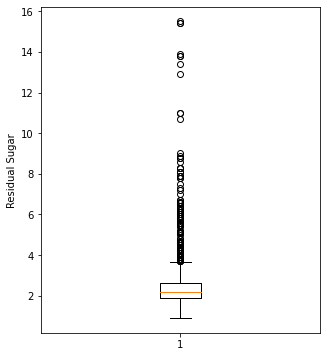

In [10]:
plt.hist(wine.residual_sugar, alpha = .5, bins = "fd")
plt.title("FD Bin Number")
plt.show()
stats.probplot(wine.residual_sugar, dist = "norm", plot = plt)
plt.show()
plt.figure(figsize=(5,6))
plt.boxplot(wine.residual_sugar)
plt.ylabel("Residual Sugar")
plt.show()

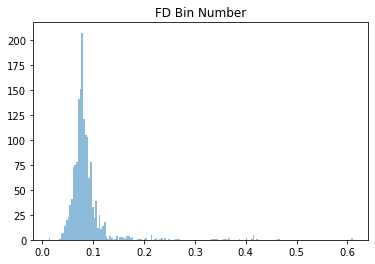

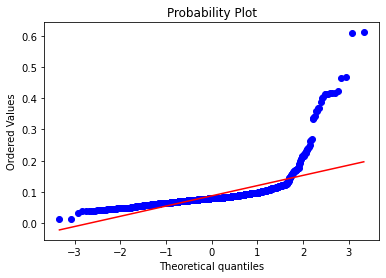

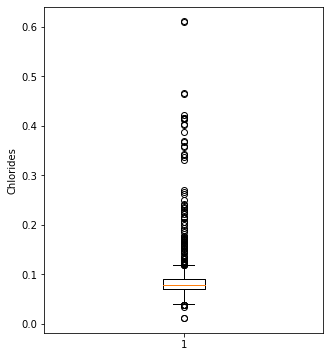

In [11]:
plt.hist(wine.chlorides, alpha = .5, bins = "fd")
plt.title("FD Bin Number")
plt.show()
stats.probplot(wine.chlorides, dist = "norm", plot = plt)
plt.show()
plt.figure(figsize=(5,6))
plt.boxplot(wine.chlorides)
plt.ylabel("Chlorides")
plt.show()

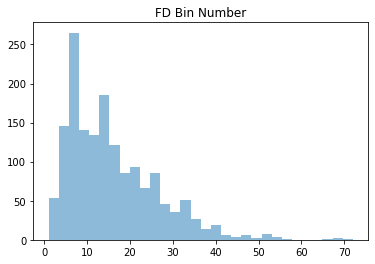

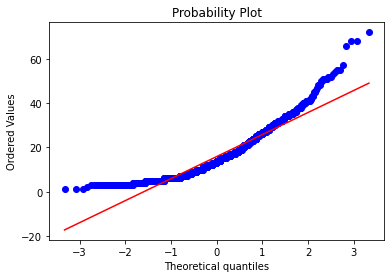

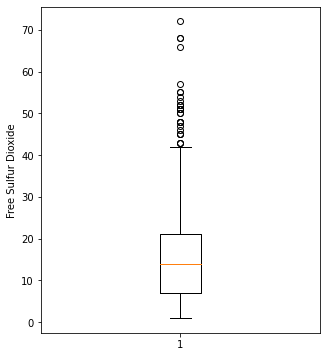

In [12]:
plt.hist(wine.free_sulfur_dioxide, alpha = .5, bins = "fd")
plt.title("FD Bin Number")
plt.show()
stats.probplot(wine.free_sulfur_dioxide, dist = "norm", plot = plt)
plt.show()
plt.figure(figsize=(5,6))
plt.boxplot(wine.free_sulfur_dioxide)
plt.ylabel("Free Sulfur Dioxide")
plt.show()

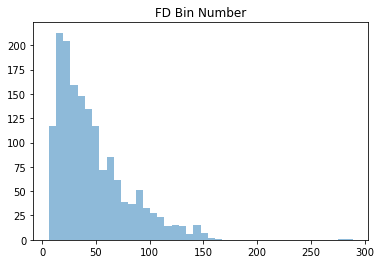

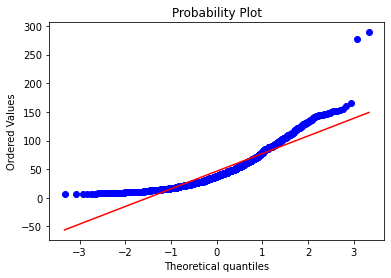

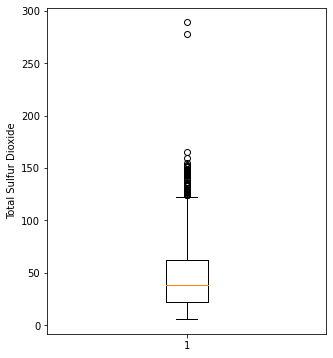

In [13]:
plt.hist(wine.total_sulfur_dioxide, alpha = .5, bins = "fd")
plt.title("FD Bin Number")
plt.show()
stats.probplot(wine.total_sulfur_dioxide, dist = "norm", plot = plt)
plt.show()
plt.figure(figsize=(5,6))
plt.boxplot(wine.total_sulfur_dioxide)
plt.ylabel("Total Sulfur Dioxide")
plt.show()

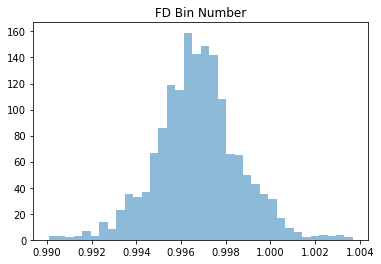

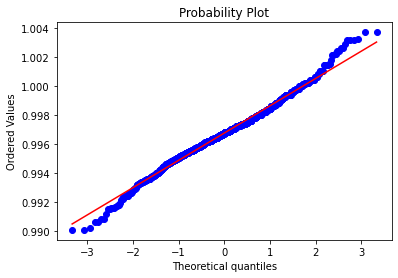

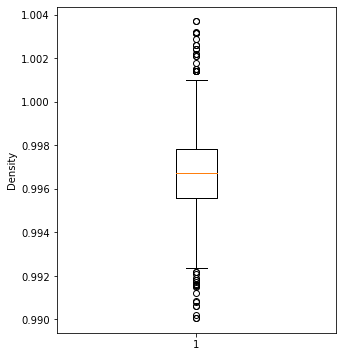

In [14]:
plt.hist(wine.density, alpha = .5, bins = "fd")
plt.title("FD Bin Number")
plt.show()
stats.probplot(wine.density, dist = "norm", plot = plt)
plt.show()
plt.figure(figsize=(5,6))
plt.boxplot(wine.density)
plt.ylabel("Density")
plt.show()

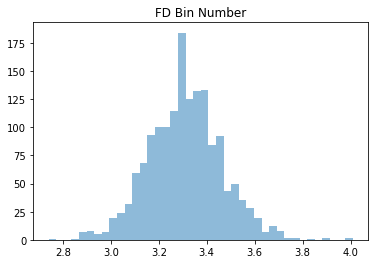

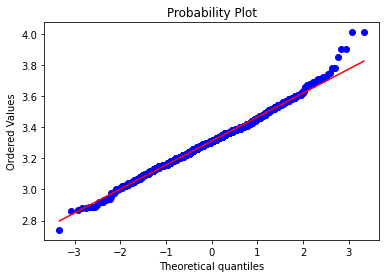

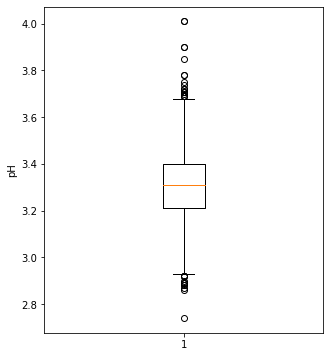

In [15]:
plt.hist(wine.pH, alpha = .5, bins = "fd")
plt.title("FD Bin Number")
plt.show()
stats.probplot(wine.pH, dist = "norm", plot = plt)
plt.show()
plt.figure(figsize=(5,6))
plt.boxplot(wine.pH)
plt.ylabel("pH")
plt.show()

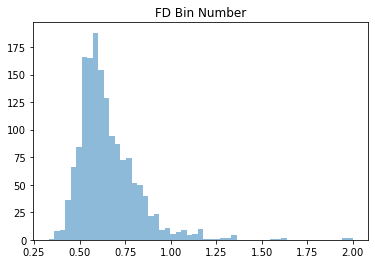

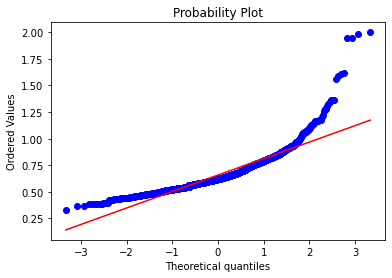

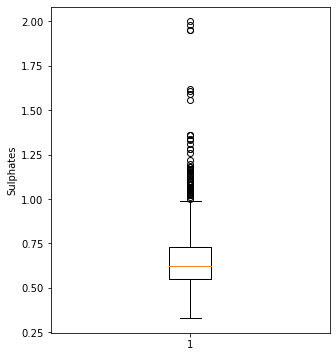

In [16]:
plt.hist(wine.sulphates, alpha = .5, bins = "fd")
plt.title("FD Bin Number")
plt.show()
stats.probplot(wine.sulphates, dist = "norm", plot = plt)
plt.show()
plt.figure(figsize=(5,6))
plt.boxplot(wine.sulphates)
plt.ylabel("Sulphates")
plt.show()

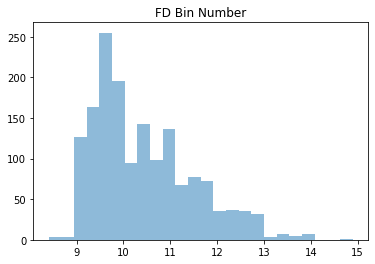

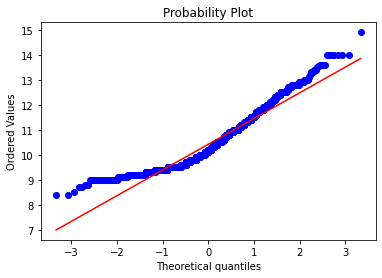

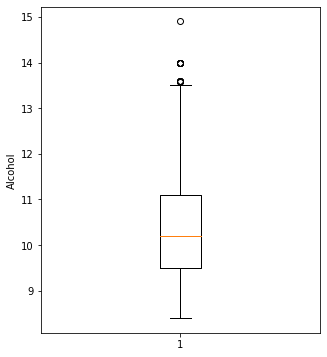

In [17]:
plt.hist(wine.alcohol, alpha = .5, bins = "fd")
plt.title("FD Bin Number")
plt.show()
stats.probplot(wine.alcohol, dist = "norm", plot = plt)
plt.show()
plt.figure(figsize=(5,6))
plt.boxplot(wine.alcohol)
plt.ylabel("Alcohol")
plt.show()

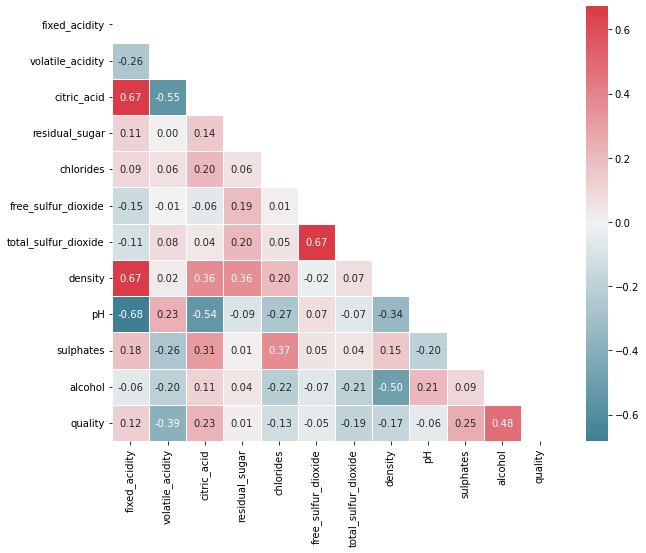

In [19]:
#correlation plot of all dependant variables
sub_df =  wine[["fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar", "chlorides", "free_sulfur_dioxide", "total_sulfur_dioxide", "density", "pH", "sulphates", "alcohol", "quality"]]
corr = sub_df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
dropvals = np.zeros_like(corr)
dropvals[np.triu_indices_from(dropvals)] = True
sns.heatmap(corr, cmap = colormap, linewidths = .5, annot = True, fmt = ".2f", mask = dropvals)
plt.show()

### Density plots

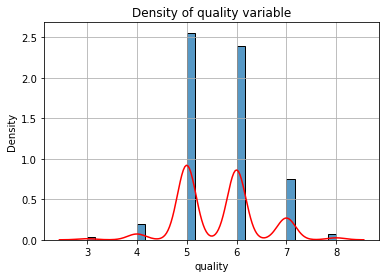

In [20]:
sns.histplot(wine.quality, stat="density")
sns.kdeplot(wine.quality, color="red")
plt.title("Density of quality variable")
plt.xlabel("quality")
plt.ylabel("Density")
plt.grid()
plt.show()

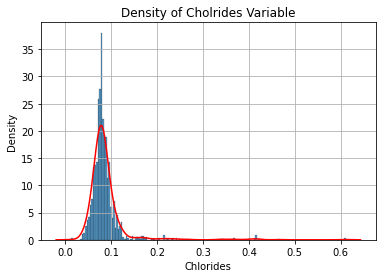

In [68]:
sns.histplot(wine.chlorides, stat="density")
sns.kdeplot(wine.chlorides, color="red")
plt.title("Density of Cholrides Variable")
plt.xlabel("Chlorides")
plt.ylabel("Density")
plt.grid()
plt.show()


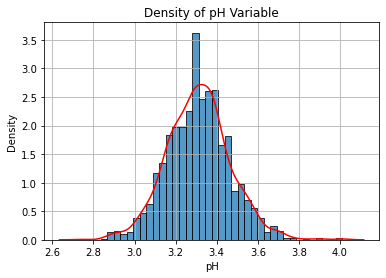

In [69]:
sns.histplot(wine.pH, stat="density")
sns.kdeplot(wine.pH, color="red")
plt.title("Density of pH Variable")
plt.xlabel("pH")
plt.ylabel("Density")
plt.grid()
plt.show()

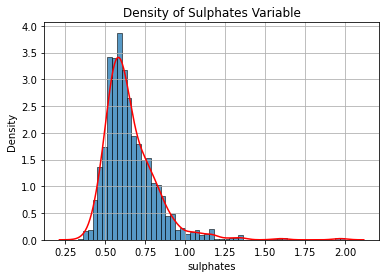

In [70]:
sns.histplot(wine.sulphates, stat="density")
sns.kdeplot(wine.sulphates, color="red")
plt.title("Density of Sulphates Variable")
plt.xlabel("sulphates")
plt.ylabel("Density")
plt.grid()
plt.show()

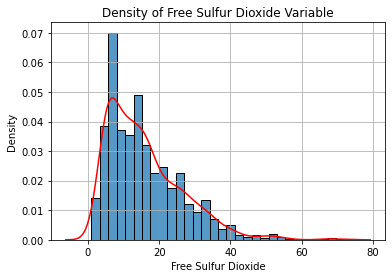

In [71]:
sns.histplot(wine.free_sulfur_dioxide, stat="density")
sns.kdeplot(wine.free_sulfur_dioxide, color="red")
plt.title("Density of Free Sulfur Dioxide Variable")
plt.xlabel("Free Sulfur Dioxide")
plt.ylabel("Density")
plt.grid()
plt.show()

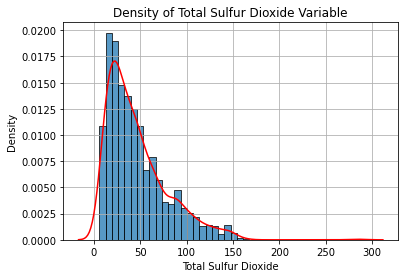

In [72]:
sns.histplot(wine.total_sulfur_dioxide, stat="density")
sns.kdeplot(wine.total_sulfur_dioxide, color="red")
plt.title("Density of Total Sulfur Dioxide Variable")
plt.xlabel("Total Sulfur Dioxide")
plt.ylabel("Density")
plt.grid()
plt.show()

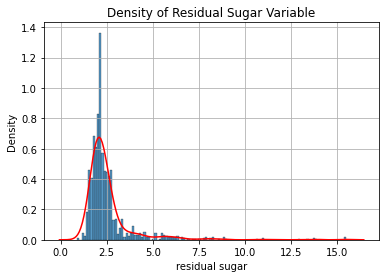

In [73]:
sns.histplot(wine.residual_sugar, stat="density")
sns.kdeplot(wine.residual_sugar, color="red")
plt.title("Density of Residual Sugar Variable")
plt.xlabel("residual sugar")
plt.ylabel("Density")
plt.grid()
plt.show()

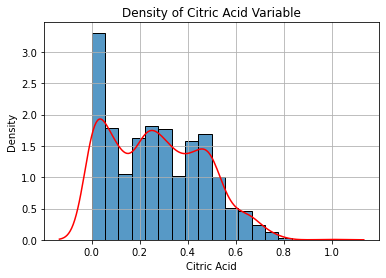

In [74]:
sns.histplot(wine.citric_acid, stat="density")
sns.kdeplot(wine.citric_acid, color="red")
plt.title("Density of Citric Acid Variable")
plt.xlabel("Citric Acid")
plt.ylabel("Density")
plt.grid()
plt.show()

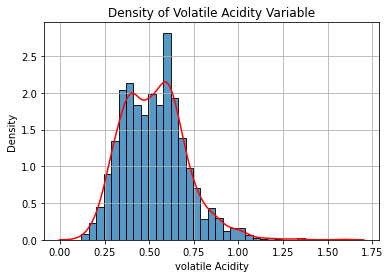

In [75]:
sns.histplot(wine.volatile_acidity, stat="density")
sns.kdeplot(wine.volatile_acidity, color="red")
plt.title("Density of Volatile Acidity Variable")
plt.xlabel("volatile Acidity")
plt.ylabel("Density")
plt.grid()
plt.show()

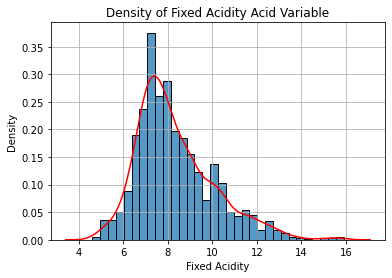

In [76]:
sns.histplot(wine.fixed_acidity, stat="density")
sns.kdeplot(wine.fixed_acidity, color="red")
plt.title("Density of Fixed Acidity Acid Variable")
plt.xlabel("Fixed Acidity")
plt.ylabel("Density")
plt.grid()
plt.show()

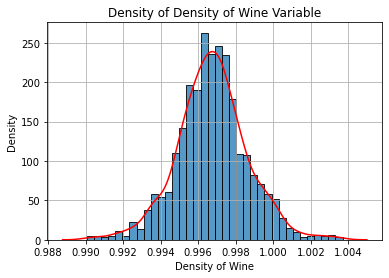

In [77]:
sns.histplot(wine.density, stat="density")
sns.kdeplot(wine.density, color="red")
plt.title("Density of Density of Wine Variable")
plt.xlabel("Density of Wine")
plt.ylabel("Density")
plt.grid()
plt.show()

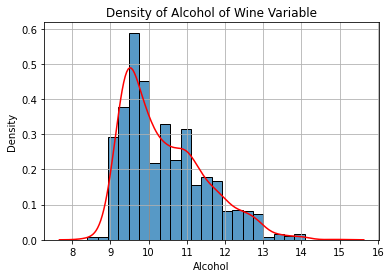

In [78]:
sns.histplot(wine.alcohol, stat="density")
sns.kdeplot(wine.alcohol, color="red")
plt.title("Density of Alcohol of Wine Variable")
plt.xlabel("Alcohol")
plt.ylabel("Density")
plt.grid()
plt.show()

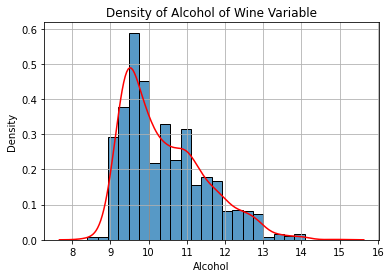

In [79]:
sns.histplot(wine.alcohol, stat="density")
sns.kdeplot(wine.alcohol, color="red")
plt.title("Density of Alcohol of Wine Variable")
plt.xlabel("Alcohol")
plt.ylabel("Density")
plt.grid()
plt.show()

### Linearities

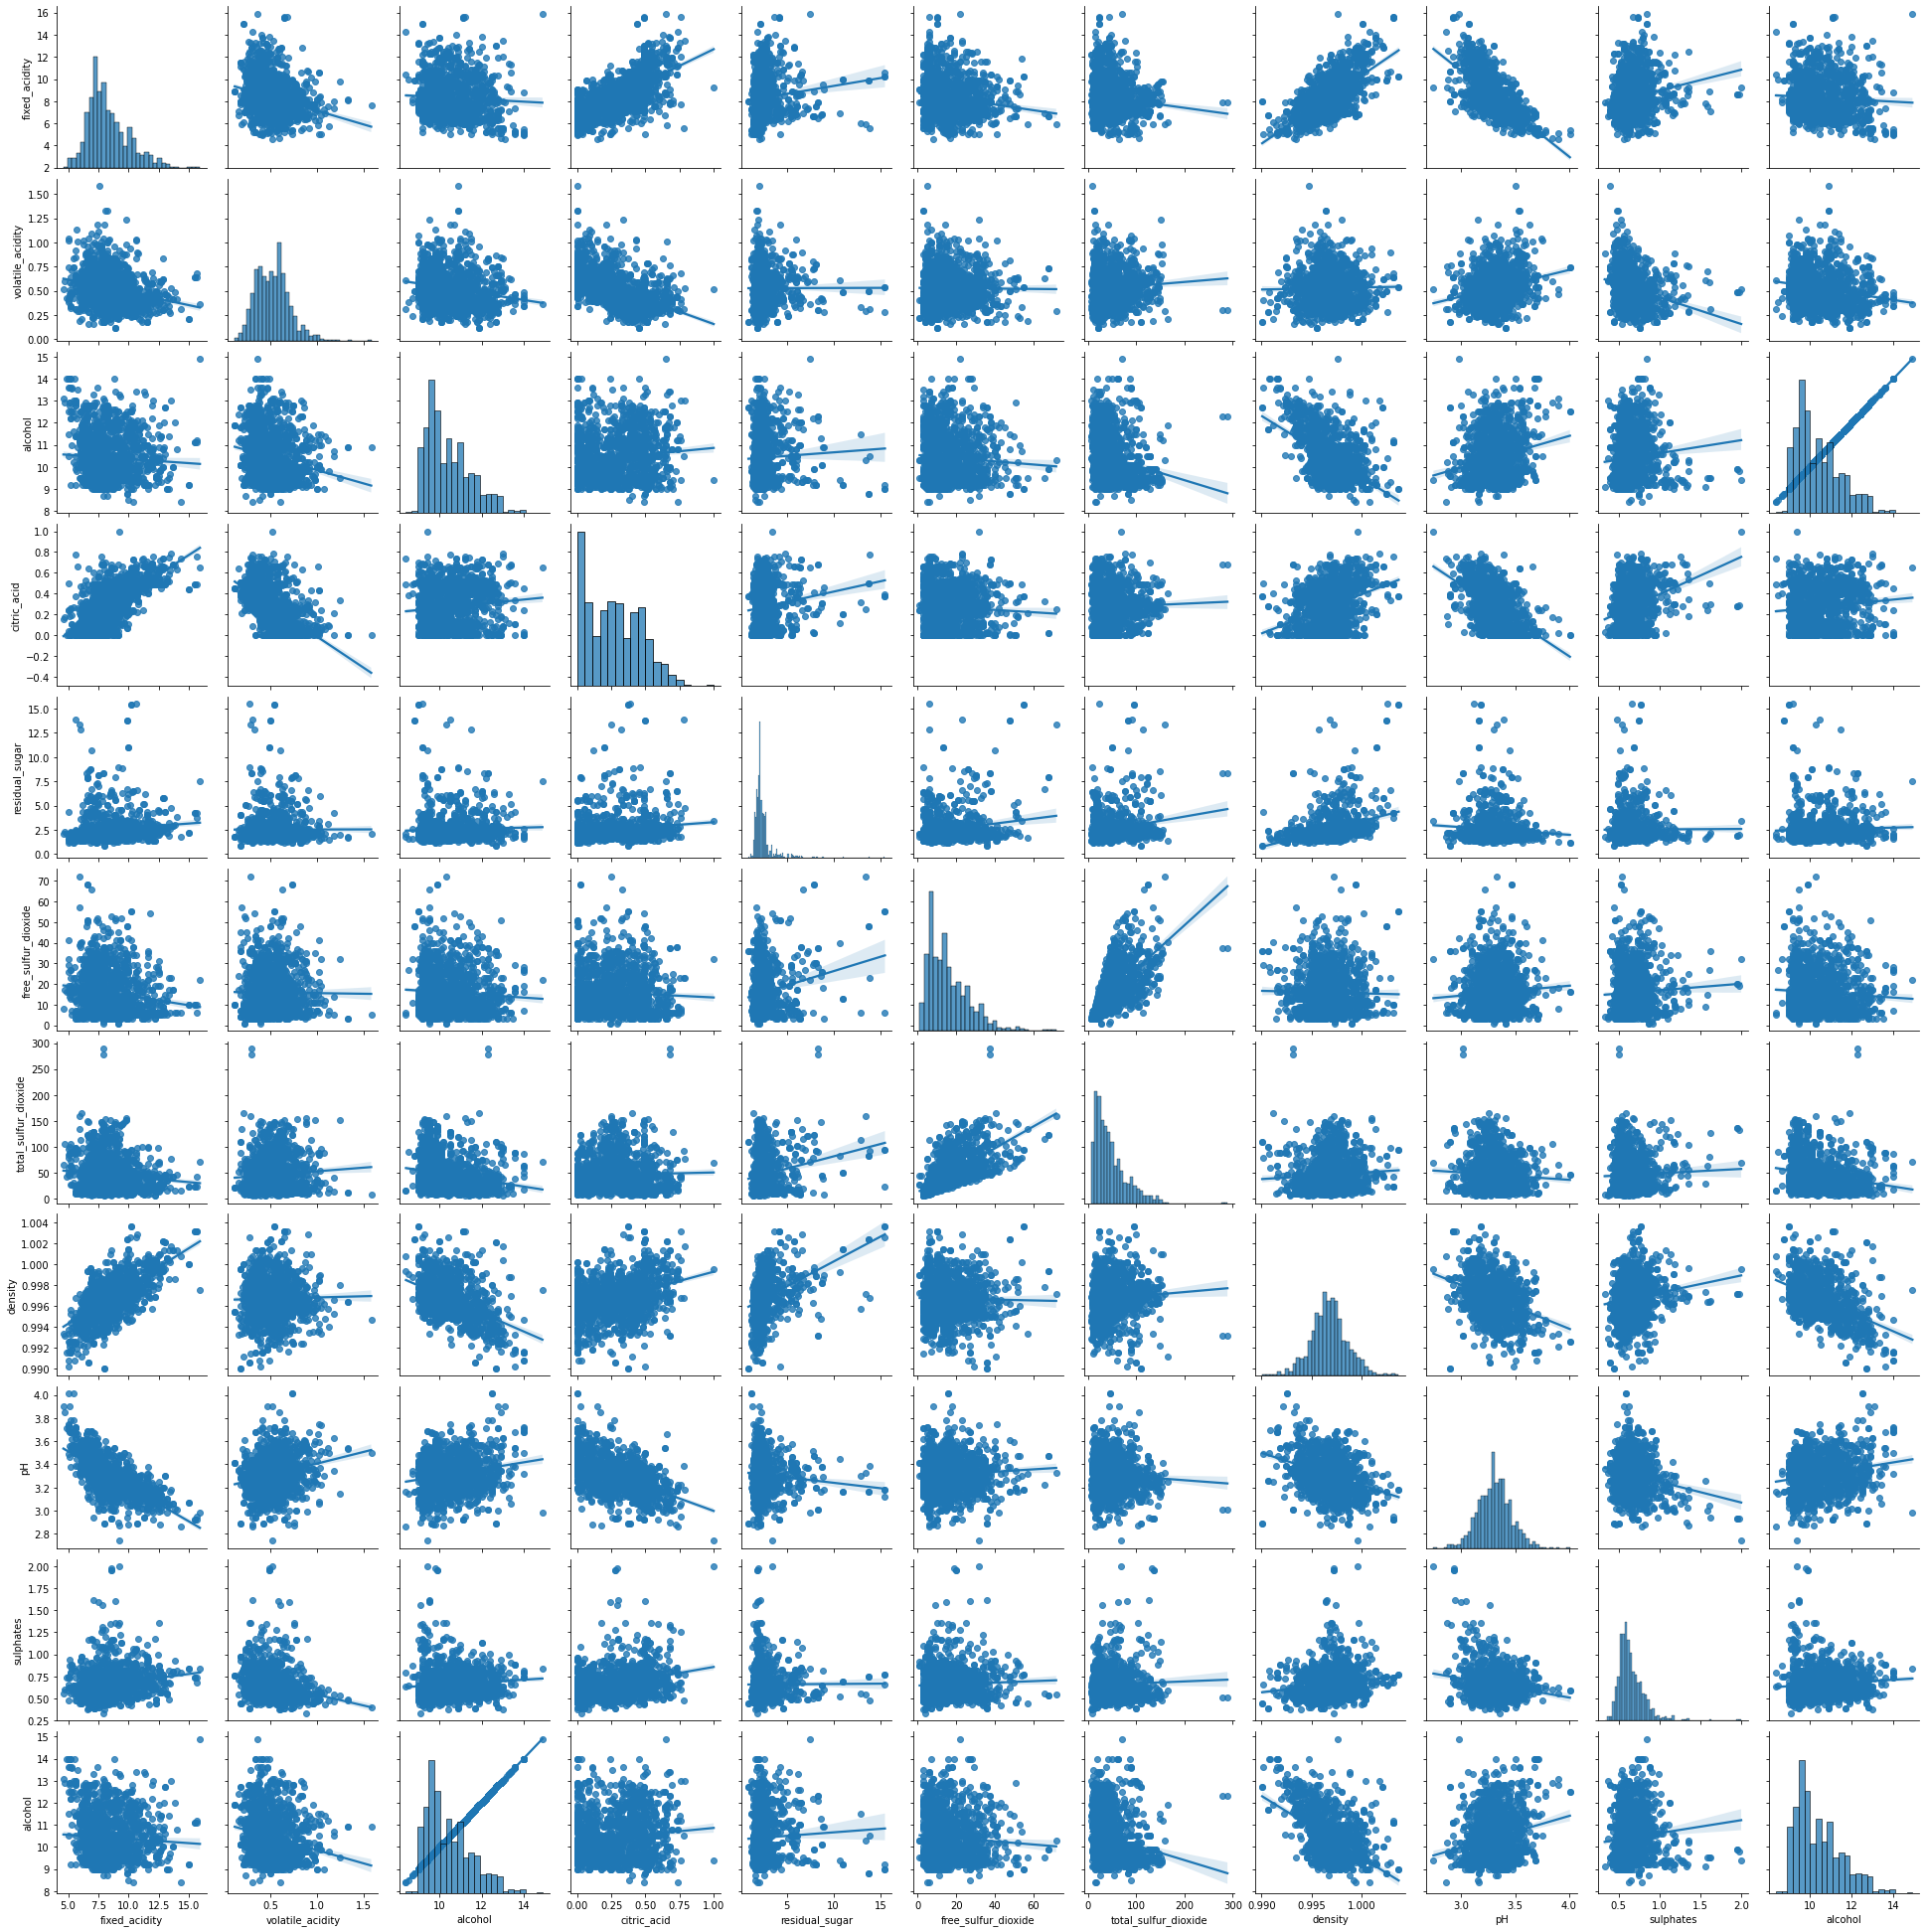

In [22]:
#A cumulative pairplot to visually describe the relationship between all relavant dependant variables
sns.pairplot(wine, vars=['fixed_acidity', 'volatile_acidity', 'alcohol', 'citric_acid', 'residual_sugar', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol'], kind='reg')

In [24]:
import statsmodels.api as sm
import statsmodels as sms
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Using the Harvey-Collier Test with alpha = 0.05 we find:

Linear Variables - Alcohol;

Non-Linear Variable - fixed acidity, volatile acidity, alcohol, residual sugar, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol;

Unable to Obtain: citric acid.

In [25]:
import statsmodels.stats.api as sms

Fix_acid = smf.ols(formula='quality ~ fixed_acidity', data=wine)
FA_fit = Fix_acid.fit()
name = ["t-stat", "p-value"]
test = sms.linear_harvey_collier(FA_fit)
print("Linearity Test Results:",['Fixed Acidity'])
print(list(zip(name, test)))
print("\n")

Vol_acid = smf.ols(formula='quality ~ volatile_acidity', data=wine)
VA_fit = Vol_acid.fit()
name = ["t-stat", "p-value"]
test = sms.linear_harvey_collier(VA_fit)
print("Linearity Test Results:",['Volatile Acidity'])
print(list(zip(name, test)))
print("\n")

Alc = smf.ols(formula='quality ~ alcohol', data=wine)
A_fit = Alc.fit()
name = ["t-stat", "p-value"]
test = sms.linear_harvey_collier(A_fit)
print("Linearity Test Results:",['Alcohol'])
print(list(zip(name, test)))
print("\n")

RS = smf.ols(formula='quality ~ residual_sugar', data=wine)
RS_fit = RS.fit()
name = ["t-stat", "p-value"]
test = sms.linear_harvey_collier(RS_fit)
print("Linearity Test Results:",['Residual Sugar'])
print(list(zip(name, test)))
print("\n")

FSD = smf.ols(formula='quality ~ free_sulfur_dioxide', data=wine).fit()
name = ["t-stat", "p-value"]
test = sms.linear_harvey_collier(FSD)
print("Linearity Test Results:",['Free Sulfur Dioxide'])
print(list(zip(name, test)))
print("\n")

TSD = smf.ols(formula='quality ~ total_sulfur_dioxide', data=wine).fit()
name = ["t-stat", "p-value"]
test = sms.linear_harvey_collier(TSD)
print("Linearity Test Results:",['Total Suflur Dioxide'])
print(list(zip(name, test)))
print("\n")

D = smf.ols(formula='quality ~ density', data=wine).fit()
name = ["t-stat", "p-value"]
test = sms.linear_harvey_collier(D)
print("Linearity Test Results:",['Density'])
print(list(zip(name, test)))
print("\n")

pH = smf.ols(formula='quality ~ pH', data=wine).fit()
name = ["t-stat", "p-value"]
test = sms.linear_harvey_collier(pH)
print("Linearity Test Results:",['pH'])
print(list(zip(name, test)))
print("\n")

S = smf.ols(formula='quality ~ sulphates', data=wine).fit()
name = ["t-stat", "p-value"]
test = sms.linear_harvey_collier(S)
print("Linearity Test Results:",['Sulphates'])
print(list(zip(name, test)))
print("\n")

Ch_acid = smf.ols(formula='quality ~ chlorides', data=wine)
ch_fit = Ch_acid.fit()
name = ["t-stat", "p-value"]
test = sms.linear_harvey_collier(ch_fit)
print("Linearity Test Results:",['Chlorides'])
print(list(zip(name, test)))
print("\n")

Linearity Test Results: ['Fixed Acidity']
[('t-stat', 4.214151201525691), ('p-value', 2.6476234461039558e-05)]


Linearity Test Results: ['Volatile Acidity']
[('t-stat', 4.350554655008995), ('p-value', 1.4440703121093765e-05)]


Linearity Test Results: ['Alcohol']
[('t-stat', -0.17583690782491607), ('p-value', 0.8604443936674834)]


Linearity Test Results: ['Residual Sugar']
[('t-stat', 4.616762481443584), ('p-value', 4.210150074710081e-06)]


Linearity Test Results: ['Free Sulfur Dioxide']
[('t-stat', 4.858959572521808), ('p-value', 1.296017167625733e-06)]


Linearity Test Results: ['Total Suflur Dioxide']
[('t-stat', 3.5248884224810086), ('p-value', 0.0004356297006044794)]


Linearity Test Results: ['Density']
[('t-stat', 1.9914101566169604), ('p-value', 0.046606124038475374)]


Linearity Test Results: ['pH']
[('t-stat', 4.804432319627084), ('p-value', 1.6976934064388046e-06)]


Linearity Test Results: ['Sulphates']
[('t-stat', 5.833477269590315), ('p-value', 6.560307561085536e-09)]


In [27]:
#citric acid does not output a linearity statistic
CA = smf.ols(formula='quality ~ citric_acid', data=wine).fit()
name = ["t-stat", "p-value"]
test = sms.linear_harvey_collier(CA, skip = 100)
print("Linearity Test Results:",['Citric Acid'])
print(list(zip(name, test)))
print("\n")

Linearity Test Results: ['Citric Acid']
[('t-stat', nan), ('p-value', nan)]




Firstly, for all the non-linear variables we’d want to use the Box-Cox Power Transformation to normalize the distribution of each variable. This helps with modeling/estimating the regression and finding a suitable linear transform. The Box-Cox lambda for each variable is:

In [29]:
winecopy = wine.copy()
winecopy = winecopy.drop('citric_acid', axis=1)
winecopy.columns

for i in range(len(winecopy.columns)):
    bc_den, lambda_den = stats.boxcox(abs(winecopy.iloc[:,i]))
    print("lambda for", winecopy.columns[i], ":")
    print(lambda_den)



lambda for fixed_acidity :
-0.6686166360918417
lambda for volatile_acidity :
0.3996635304812539
lambda for residual_sugar :
-1.180347626085983
lambda for chlorides :
-0.4575007601555054
lambda for free_sulfur_dioxide :
0.14508106677869678
lambda for total_sulfur_dioxide :
0.050734224637555905
lambda for density :
-8.159253887367166
lambda for pH :
-0.029098600072061095
lambda for sulphates :
-1.062058963828985
lambda for alcohol :
-3.326061546610133
lambda for quality :
0.6199200904791681


For the non-linear predictors, all dependant variables except for alcohol as determined by the Harvey-Collier Test, we’d use the component+residual/CERES plots to visualize the nonlinear variables and the Box-Tidwell method to linearize each variable.


*Outcomes of running a regression with non-linearity inside the variables:*

The regression results would not be interpretable if the varibles are non-linear. The Regression expects a linear relationship between the predictors and the dependent variable and including non-linear variables that haven’t been transformed will skew and distort the results of your regression.

### Outliers

According to the box plots, volatile acidity, fixed acidity, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, and sulphates all have outliers that extend far beyond the median. These outliers can be tested using a Cook’s Distance plot, DFFITS, or studentized residuals to confirm they are indeed outliers. From there, we can establish a threshold that will eliminate the outliers that extend beyond the threshold. If too many rows are taken away, we could turn the outliers into the mean value of that specific variable. 

### Null Values

In [66]:
wine.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

We do not have any null values

## Variable selection

### Boruta algorithm

In [30]:
mr_mod = smf.ols(formula = 'quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol', data=wine)
mr_fit = mr_mod.fit()
print(mr_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Wed, 19 Oct 2022   Prob (F-statistic):          1.79e-145
Time:                        21:45:22   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               21.9652 

In [31]:
x = wine.iloc[:,0:11]
y = wine['quality']

  0%|          | 0/50 [00:00<?, ?it/s]

6 attributes confirmed important: ['alcohol', 'pH', 'chlorides', 'volatile_acidity', 'total_sulfur_dioxide', 'sulphates']
4 attributes confirmed unimportant: ['density', 'fixed_acidity', 'residual_sugar', 'citric_acid']
1 tentative attributes remains: ['free_sulfur_dioxide']


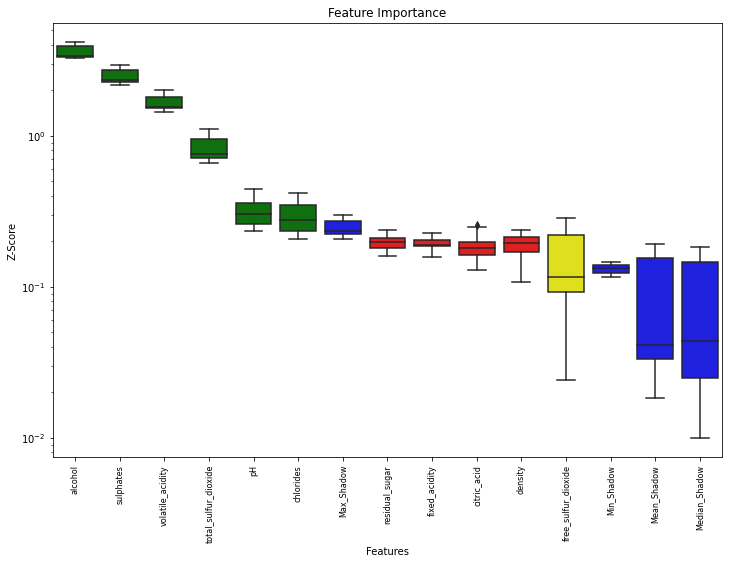

In [32]:
Feature_Selector = BorutaShap(importance_measure='shap', classification=False)
Feature_Selector.fit(X=x, y=y, n_trials=50, random_state=0)
Feature_Selector.plot(which_features='all')

### Mallows Cp

In [33]:
from RegscorePy import mallow

In [34]:
subdat = wine[['quality', 'fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']].copy()

In [35]:
import itertools

regr = smf.ols(formula='quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol', data=wine)
result = regr.fit()
y = np.log(wine['quality'])
y_pred=result.fittedvalues


storage_cp = pd.DataFrame(columns = ["Variables", "CP"])
k = 12

for L in range(1, len(subdat.columns[1:]) + 1):
    for subset in itertools.combinations(subdat.columns[1:], L):
        
        formula1 = 'quality~'+'+'.join(subset)
        
        result = smf.ols(formula=formula1, data=wine).fit()
        y_sub = result.fittedvalues
        p = len(subset)+1 
        
        cp = mallow.mallow(y, y_pred,y_sub, k, p)
               
        storage_cp = storage_cp.append({'Variables': subset, 'CP': cp}, ignore_index = True)

In [36]:
cp_sorted = storage_cp.sort_values(by="CP")
cp_sorted

,Variables,CP
3,"(residual_sugar,)",-23.602147
5,"(free_sulfur_dioxide,)",-23.488624
8,"(pH,)",-23.474584
0,"(fixed_acidity,)",-22.942866
4,"(chlorides,)",-22.899758
...,...,...
2042,"(fixed_acidity, volatile_acidity, citric_acid,...",9.973726
2043,"(fixed_acidity, volatile_acidity, residual_sug...",9.978669
2045,"(volatile_acidity, citric_acid, residual_sugar...",9.979639
2038,"(fixed_acidity, volatile_acidity, citric_acid,...",9.983233


In [37]:
cp_sorted.head(14)

,Variables,CP
3,"(residual_sugar,)",-23.602147
5,"(free_sulfur_dioxide,)",-23.488624
8,"(pH,)",-23.474584
0,"(fixed_acidity,)",-22.942866
4,"(chlorides,)",-22.899758
7,"(density,)",-22.266986
6,"(total_sulfur_dioxide,)",-22.081818
42,"(residual_sugar, pH)",-21.470232
39,"(residual_sugar, free_sulfur_dioxide)",-21.46098
2,"(citric_acid,)",-21.394222


In [38]:
cp_sorted.iloc[65:66]

,Variables,CP
1,"(volatile_acidity,)",-17.161598


In [39]:
cp_sorted.iloc[166:167]

,Variables,CP
10,"(alcohol,)",-13.680739


## Model building

### Variable transformation

In [40]:
def box_cox(x, l = 0):
    if l == 0:
        bc = np.log(x)
    else:
        bc = (x**l-1)/l
    
    return bc

<AxesSubplot:>

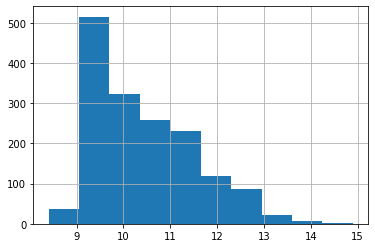

In [41]:
wine.alcohol.hist()

<AxesSubplot:>

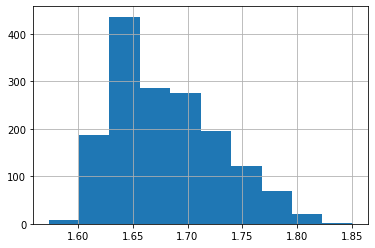

In [42]:
box_cox(wine.alcohol, -.3).hist()

In [43]:
import scipy.stats as stats

-3.326061546610133


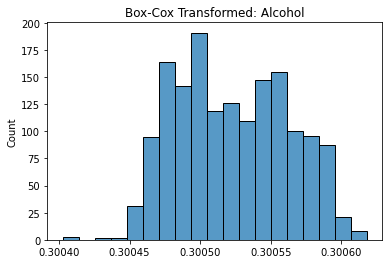

In [44]:
bc_alcohol, lambda_alcohol = stats.boxcox(wine["alcohol"])
print(lambda_alcohol)
sns.histplot(bc_alcohol)
plt.title("Box-Cox Transformed: Alcohol")
plt.show()

In [45]:
print(bc_alcohol)

[0.30048156 0.30050412 0.30050412 ... 0.30055254 0.30052303 0.30055254]


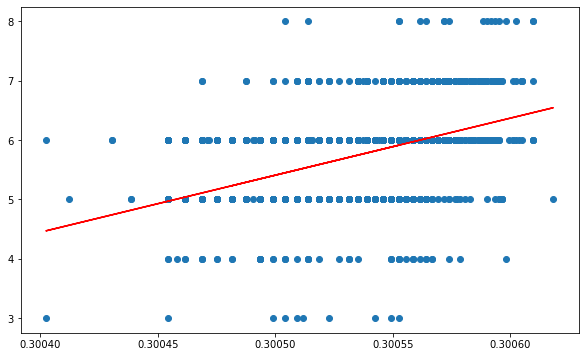

In [46]:
plt.figure(figsize = (10, 6))
plt.scatter(bc_alcohol, wine.quality)

ols_mod_bc = smf.ols(formula='quality ~ bc_alcohol', data=wine)
ols_fit_bc = ols_mod_bc.fit()
plt.plot(bc_alcohol, ols_fit_bc.fittedvalues, color = "red")

In [47]:
ols_fit_bc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     446.6
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           1.30e-87
Time:                        22:15:37   Log-Likelihood:                -1729.5
No. Observations:                1599   AIC:                             3463.
Df Residuals:                    1597   BIC:                             3474.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2885.7879    136.818    -21.092      0.000   -3154.150   -2617.426
bc_alcohol  9621.2834    455.265     21.133      0.000    8728.303    1.05e+04
==============================================================================
Omnibus:                       36.889   Durbin-Watson:                   1.751
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.211
Skew:                          -0.153   Prob(JB):                     2.54e-15
Kurtosis:                       3.956   Cond. No.                     2.78e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

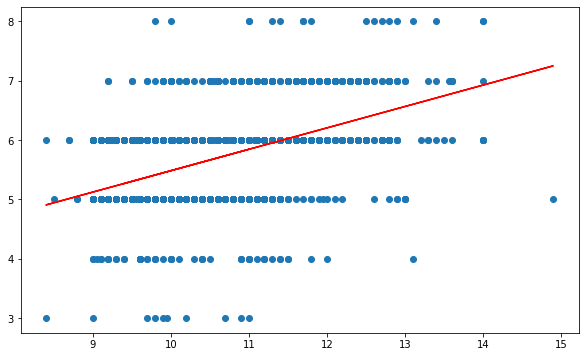

In [65]:
plt.figure(figsize = (10, 6))
plt.scatter(wine.alcohol, wine.quality)

ols_mod = smf.ols(formula='quality ~ alcohol', data=wine)
ols_fit = ols_mod.fit()
plt.plot(wine.alcohol, ols_fit.fittedvalues, color = "red")

In [49]:
ols_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     468.3
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           2.83e-91
Time:                        22:15:37   Log-Likelihood:                -1721.1
No. Observations:                1599   AIC:                             3446.
Df Residuals:                    1597   BIC:                             3457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8750      0.175     10.732      0.000       1.532       2.218
alcohol        0.3608      0.017     21.639      0.000       0.328       0.394
==============================================================================
Omnibus:                       38.501   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.758
Skew:                          -0.154   Prob(JB):                     2.62e-16
Kurtosis:                       3.991   Cond. No.                         104.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Predictor Evaluation and Economic Significance 

Mallows CP found that the best model will use alcohol and the second best model will use volatile acidity. Baruta found the best predictor to be alcohol and the second best predictor to be sulphates. We decided to use alcohol as our predictor variable since both Mallows CP and Baruta agree that it is the best predictor variable for our model. We transformed alcohol according to the box-cox recommendation, raising the data for alcohol to the power of -3. However, Mallows CP and Baruta both prefer alcohol to be untouched. The Harvey-Collier test found that alcohol failed to reject the null value, indicating it is linear as well. In addition, alcohol does not have any null values giving us a complete data set. We ran a regression using the transformed alcohol and normal alcohol. The transformed alcohol had an adjusted R-squared of 0.218, and the untouched alcohol data had an adjusted R-squared of 0.226. It is a very small difference in R-squared, only 0.008, but the untouched alcohol still had a higher R-squared. In the end all test statistics pointed to using alcohol without a transformation. It is hard to tell what makes good wine as it is somewhat subjective. However, using econometrics we are able to get a better understanding of what people enjoy most about wine on average. These findings could help bolster the recognition of a vineyard just starting out by increasing the perceived quality of the wine. Increasing the alcohol content in their wine increases the quality on average. This data helps to corroborate the findings that many experts prefer Napa Valley wine over French wine. For several decades French wine was considered to be the prodigious wine in the world. Farmers started cultivating lands in the Napa Valley and began winning blind taste tests among experts. Researchers have found that Napa Valley wine contains more alcohol content than the French wine which researchers prefer. The French could help boost their economy of wine production if they could increase the alcohol content. Hayden’s family runs a fine dining restaurant in Sacramento, California, and has visited Napa several times, discussing the wines with farmers. His family utilizes this information to pick wines with higher alcohol content to appease customers. 

### Cook's distance Plot and Residuals Plot

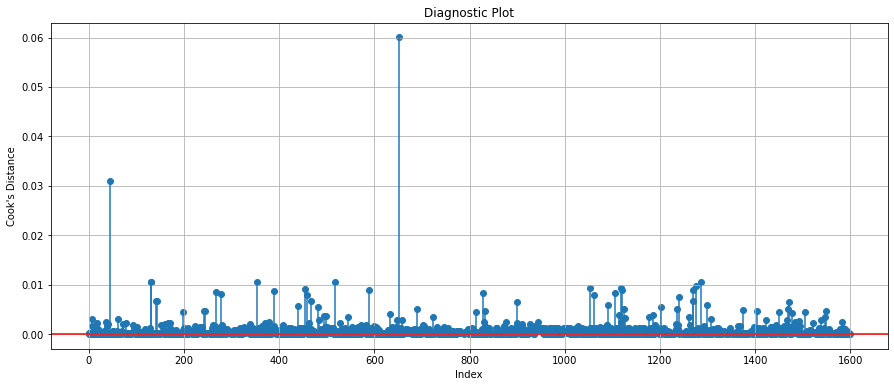

In [50]:
cooks_distance = ols_fit.get_influence().cooks_distance
plt.figure(figsize = (15, 6))
plt.scatter(wine.index, cooks_distance[0])
plt.axhline(0, color = 'red')
plt.vlines(x = wine.index, ymin = 0, ymax = cooks_distance[0])
plt.xlabel('Index')
plt.ylabel('Cook\'s Distance')
plt.title("Diagnostic Plot")
plt.grid()

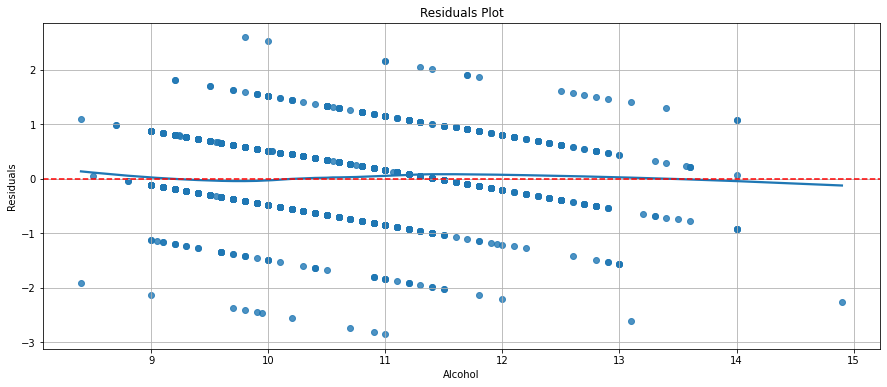

In [51]:
plt.figure(figsize = (15, 6))
sns.regplot(x = wine.alcohol, y = ols_fit.resid, lowess = True)
plt.axhline(0, linestyle = '--', color = "red")
plt.ylabel("Residuals")
plt.xlabel("Alcohol")
plt.title("Residuals Plot")
plt.grid()
plt.show()

### Robustness evaluation

Bootstrap: Through bootstrapping with 1000 trials, we were able to produce bootstrapped estimates of the regression coefficients and r-squared for our model. By relying directly on the data through resampling, the bootstrap offers us a natural, more robust estimate of our parameters than the normal estimation. Looking at the histograms of our bootstrapped parameters, the bootstrap distribution looks fairly normal for each parameter. The most rewarding part of the histogram though is that the regression parameters from the original, bootstrapped sample actually fit very well over the bootstrapped histograms, which is additional evidence towards the accuracy of our model. Our data frame had a pretty robust sample size, which could be one reason the resampling didn’t result in a significant departure from the original model.

In [52]:
bc_wine = wine.copy()

In [53]:
bc_wine['bc_alcohol']=bc_alcohol

In [54]:
import statsmodels.formula.api as sm

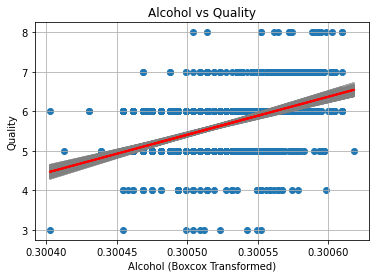

In [55]:
boot_slopes = []
boot_interc = []
boot_adjR2 = []
n_boots = 1000
n_points = wine.shape[0]
plt.figure()
for _ in range(n_boots):
    sample_wine = bc_wine.sample(n=n_points, replace=True)
    ols_model_temp = sm.ols(formula = 'quality ~ bc_alcohol', data=sample_wine)
    results_temp = ols_model_temp.fit()
 
    boot_interc.append(results_temp.params[0])
    boot_slopes.append(results_temp.params[1])
    boot_adjR2.append(results_temp.rsquared_adj)
 
    y_pred_temp = ols_model_temp.fit().predict(sample_wine['bc_alcohol'])
    plt.plot(sample_wine['bc_alcohol'], y_pred_temp, color='grey', alpha=0.7)

ols_simple = sm.ols(formula = 'quality ~ bc_alcohol', data=bc_wine)
y_pred = ols_simple.fit().predict(bc_wine['bc_alcohol'])
plt.scatter(bc_wine['bc_alcohol'], bc_wine['quality'])
plt.plot(bc_wine['bc_alcohol'], y_pred, linewidth=2,color = 'red')
plt.grid(True)
plt.xlabel('Alcohol (Boxcox Transformed)')
plt.ylabel('Quality')
plt.title('Alcohol vs Quality')
plt.show()

In [56]:
ols_simple_results = ols_simple.fit()
simple_b0,simple_b1 = ols_simple_results.params
simple_rsquared= ols_simple_results.rsquared
print(simple_b0,simple_b1)
print(simple_rsquared)

-2885.7879018091676 9621.283413399562
0.21854324102120526


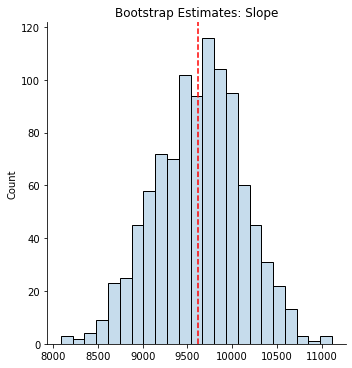

In [57]:
sns.displot(boot_slopes, alpha = 0.25)
plt.axvline(x=simple_b1,color='red', linestyle='--')
plt.title('Bootstrap Estimates: Slope')
plt.show()

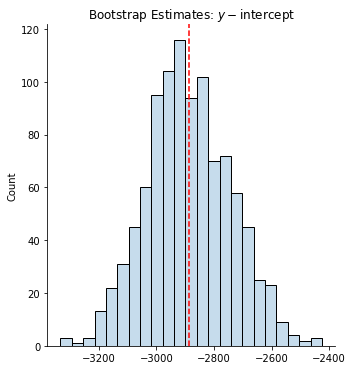

In [58]:
sns.displot(boot_interc, alpha = 0.25)
plt.axvline(x=simple_b0,color='red', linestyle='--')
plt.title('Bootstrap Estimates: $y-$intercept')
plt.show()

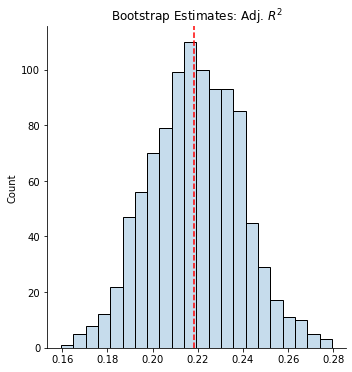

In [59]:
sns.displot(boot_adjR2, alpha = 0.25)
plt.axvline(x=simple_rsquared,color='red', linestyle='--')
plt.title('Bootstrap Estimates: Adj. $R^2$')
plt.show()

### Cross-validation

In [60]:
kf = KFold(n_splits=5)

mse = []
for train_index, test_index in kf.split(wine):
    results = smf.ols('quality ~ alcohol', wine.iloc[train_index]).fit()
    s = ((wine.iloc[test_index]['quality'] - results.predict(wine.iloc[test_index])**2)).mean()
    mse.append(s)

In [61]:
mse

[-24.23238953219302,
 -25.68452649362523,
 -26.37068136780895,
 -27.783748066131277,
 -27.166364870678898]

In [62]:
reg_mse = smf.ols('quality ~ alcohol', data = wine)
results = reg_mse.fit()
(results.resid**2).mean()

0.5039840256714576

In [63]:
x = wine[['alcohol']]
y = wine[['quality']]
regr = LinearRegression()
scores = cross_val_score(regr,x,y, cv=5,scoring='neg_mean_squared_error')
print('5-Fold CV MSE Scores:', scores)

5-Fold CV MSE Scores: [-0.47127101 -0.53293457 -0.50785203 -0.496387   -0.54658904]


### Model evaluation

In [64]:
x = wine[['alcohol']]
y = wine[['quality']]
regr = LinearRegression()
model = regr.fit(x,y)
regr.coef_
regr.intercept_
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)
regr = LinearRegression()
regr.fit(x_train,y_train)
y_pred=regr.predict(x_test)
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
regr = linear_model.LinearRegression()
scores = cross_val_score(regr,x,y,cv=5,scoring='neg_root_mean_squared_error')
print('5-Fold CV MSE Scores:', scores)

MAE: 0.5230974814995661
MSE: 0.4386573651787201
RMSE: 0.6623121357628291
5-Fold CV MSE Scores: [-0.68649182 -0.73002368 -0.71263737 -0.70454737 -0.7393166 ]


## Conclusion

After testing our model, alcohol appeared to be the only linear variable and the most significant. With a of  P-Value = 0.000, it was our best predictor according to the Baruta test and our best model of a single predictor in the Mallows CP test. On average a one unit increase in alcohol raises the quality of wine by .2762. The model overall had an adjusted R-Squared of 35.6% which is low but still respectable. Some of the variables were highly correlated according to our correlation plot, such as fixed acidity taking into account citric acid leading to multicollinearity. However, we believe the model is still usable and our regression only used one predictor, alcohol. The Cook’s plot revealed some outliers in our data which can be taken care of by removing them or replacing them with the mean. Our bootstrapped datasets were quite fruitful; the bootstrapped sample fit well over the histograms indicating a fairly accurate model. On average, an increase in alcohol will help the quality of the wine, allowing wineries to cash in on this significant finding.